In [10]:
from selenium import webdriver
from bs4 import BeautifulSoup

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
sns.set_context('paper')

import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

import en_core_web_lg
nlp = en_core_web_lg.load()

In [12]:
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - Current google-chrome version is 83.0.4103
[WDM] - Get LATEST driver version for 83.0.4103


[WDM] - There is no [win32] chromedriver for browser 83.0.4103 in cache
[WDM] - Get LATEST driver version for 83.0.4103
[WDM] - Trying to download new driver from http://chromedriver.storage.googleapis.com/83.0.4103.39/chromedriver_win32.zip
[WDM] - Driver has been saved in cache [C:\Users\ADITYA\.wdm\drivers\chromedriver\win32\83.0.4103.39]


In [13]:
driver.get("https://thoughtcatalog.com/january-nelson/2018/07/true-crime-stories/")

In [14]:
content = driver.page_source
soup = BeautifulSoup(content)

In [15]:
all_paras = soup.find_all('p')

In [16]:
text = ''
for p in all_paras:
    text += p.get_text()

In [17]:
print(text)

Dedicated to your stories and ideas. Learn about us.Submit your writing to be published on Thought Catalog.Learn more about working with Thought Catalog.“She was talking on the payphone with her fiance and saying how there is this suspicious truck that keeps driving around the block. Then, that truck parks near her where the payphone is, he gets out and starts looking around with his flashlight as if he lost something, then he confronts Angela and abducts her. Her fiance heard all of this on the other line and immediately got in his car to drive where Angela was. When doing so, he drove past the guy in the truck and Angela was apparently screaming his name for help, so he turns around and tries following the truck and his transmission fucks up and the guy got away. Angela has never been heard from again. And, she was pregnant.”“I find the case of Annie Borjesson really weird. She was a Swedish student studying in Edinburgh. She then went to Prestwick airport (literally the other side o

In [18]:
document = nlp(text)
displacy.render(document, style = "ent",jupyter = True)

In [19]:
entities=[(str(i), i.label_) for i in document.ents]
print(entities)
entities_df = pd.DataFrame(entities, columns =['Entity', 'Label'])
entities_df.head()

[('Thought Catalog', 'ORG'), ('Thought Catalog', 'ORG'), ('Angela', 'PERSON'), ('Angela', 'PERSON'), ('Angela', 'PERSON'), ('Angela', 'PERSON'), ('Annie Borjesson', 'PERSON'), ('Swedish', 'NORP'), ('Edinburgh', 'GPE'), ('Prestwick', 'GPE'), ('CCTV', 'ORG'), ('ten seconds', 'TIME'), ('Prestwick', 'GPE'), ('Annie', 'PERSON'), ('Hinterkaifeck', 'PERSON'), ('A few days later', 'DATE'), ('Dorothy Scott', 'PERSON'), ('Brandon', 'PERSON'), ('19 year old', 'DATE'), ('Marshall', 'GPE'), ('MN', 'GPE'), ('Marshall', 'GPE'), ('Canby', 'PERSON'), ('two', 'CARDINAL'), ('North to South', 'LOC'), ('Marshall', 'PERSON'), ('Brandon', 'PERSON'), ('Southern MN', 'LOC'), ('Marshall', 'PERSON'), ('November 1945 through October 1950', 'DATE'), ('five', 'CARDINAL'), ('74-years-old', 'DATE'), ('One', 'CARDINAL'), ('53-year-old', 'DATE'), ('Vermont', 'GPE'), ('Long Trail', 'FAC'), ('2008', 'DATE'), ('Bennington College', 'ORG'), ('hours', 'TIME'), ('Setagaya', 'PERSON'), ('around for hours', 'TIME'), ('Middle o

,Entity,Label
0,Thought Catalog,ORG
1,Thought Catalog,ORG
2,Angela,PERSON
3,Angela,PERSON
4,Angela,PERSON


In [20]:
counts = entities_df['Label'].value_counts()
counts

PERSON         121
DATE            76
CARDINAL        70
GPE             32
ORG             24
TIME            17
QUANTITY         7
ORDINAL          7
NORP             7
LOC              6
WORK_OF_ART      4
FAC              2
PRODUCT          2
PERCENT          1
Name: Label, dtype: int64

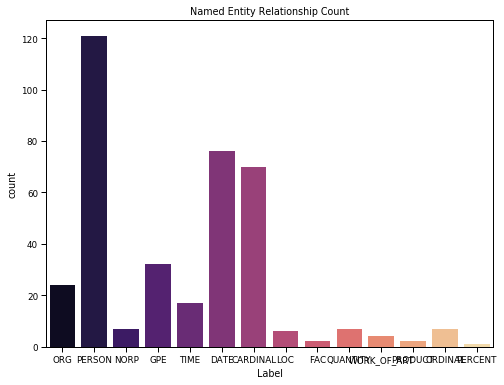

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x = 'Label', data = entities_df, palette = 'magma')
plt.title('Named Entity Relationship Count')
plt.show()